![](http://assets.newatlas.com/dims4/default/9489527/2147483647/strip/true/crop/2000x1333+0+333/resize/1200x800!/quality/90/?url=http%3A%2F%2Fnewatlas-brightspot.s3.amazonaws.com%2Farchive%2Fequipment-choices-amateur-astronomy-telescope-mount-eyepiece-14.jpg)

# Detecting Moon with Machine Learning 
### In this tutorial, you will learn how to use basic functions and libraries used for data analysis and getting started with machine learning. 

#### Note: This lession will not be very comprehensive and you may face some problem understanding it if you are a complete beginner but we have attached links to all the official documents to make things easy for you. Hope you get enjoy it!!


### Understanding the problem-

Our objective of this task is to detect Earth's Moon from images. Technically, we would want a bounding box around the moon in the image. 

First, if you have created a new notebook in kaggle, then click "Add data" given on the right side and then click on "Saerch by URL" and paste this URL: https://www.kaggle.com/yash92328/moon-workshop-spartificial and click on "Add".


If you followed the steps, you should see some updates on the RHS, in the data section, you will see the dataset folder. 

Our dataset for this task is two folders containing 75 images and 75 respective bounding box xml annotations generated from "labelme" tool. 

You will get to know more about the data in the later part

## Links to follow along this tutorial to know more about python libraries and modules used in the code

### Matplotlib
https://matplotlib.org/stable/plot_types/index.html

### Open CV
https://pypi.org/project/opencv-python/

### tensorflow
https://www.tensorflow.org/

### Keras
https://keras.io/getting_started/

### VGG16
https://keras.io/api/applications/vgg/


### Import Required libraries
Note: It would probably will not be the first step to import required libraries because you don't even know what libraries you will need in your project. But it's completely okay to import the library only when you need it later in the code.

In [ ]:
# Import os: means import operating system 
# import is a python keyword used to import libraries (libraries are a collection of many useful functions and classes for typically one type)
# https://docs.python.org/3/library/os.html
import os

# numpy is one of the most commonly used matrix manipulation library. Make sure to check out the official documentations for in-depth understanding
# https://numpy.org/doc/stable/user/whatisnumpy.html
import numpy as np

# Let's make an import in order to plot something
# we import matplotlib to plot the data
import matplotlib.pyplot as plt

# This is the import for accessing Image
from PIL import Image

# importing math for performing any mathematical operation
import math

# Importing Computervison library
# https://docs.opencv.org/4.x/
import cv2

# Importing tensorflow framework for implementing deep learning part
import tensorflow as tf


from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array 
# to convert image into array

# VGG16 pretrained keras model on imagenet dataset
from tensorflow.keras.applications import VGG16


### Let's start diving into the data 

In [ ]:
# defining directory paths

ROOT_DIR = "/content/drive/MyDrive/Moon dataset"

# path.join from os module join one or more path components intelligently.
IMAGE_DIR = os.path.join(ROOT_DIR, "Images")
ANNOT_DIR = os.path.join(ROOT_DIR, "annotations")

It would be a better idea if you convert file names to python list

In [ ]:
# listdir generates a list of all the files in the directory and return a python list of string file names

images_name_list = os.listdir(IMAGE_DIR)
annots_name_list = os.listdir(ANNOT_DIR)

In [ ]:
images_name_list

['18.jpeg',
 '74.jpeg',
 '5.jpeg',
 '39.jpeg',
 '62.jpeg',
 '34.jpeg',
 '9.jpeg',
 '15.jpeg',
 '8.jpeg',
 '4.jpeg',
 '46.jpeg',
 '3.jpeg',
 '66.jpeg',
 '47.jpeg',
 '30.jpeg',
 '52.jpeg',
 '67.jpeg',
 '53.jpeg',
 '38.jpeg',
 '72.jpeg',
 '55.jpeg',
 '12.jpeg',
 '58.jpeg',
 '27.jpeg',
 '14.jpeg',
 '60.jpeg',
 '48.jpeg',
 '50.jpeg',
 '13.jpeg',
 '7.jpeg',
 '54.jpeg',
 '0.jpeg',
 '2.jpeg',
 '69.jpeg',
 '25.jpeg',
 '65.jpeg',
 '26.jpeg',
 '10.jpeg',
 '73.jpeg',
 '31.jpeg',
 '37.jpeg',
 '35.jpeg',
 '70.jpeg',
 '6.jpeg',
 '63.jpeg',
 '22.jpeg',
 '19.jpeg',
 '44.jpeg',
 '49.jpeg',
 '24.jpeg',
 '56.jpeg',
 '32.jpeg',
 '29.jpeg',
 '43.jpeg',
 '1.jpeg',
 '11.jpeg',
 '16.jpg',
 '68.jpeg',
 '45.jpeg',
 '23.jpeg',
 '71.jpeg',
 '20.jpeg',
 '36.jpeg',
 '28.jpeg',
 '41.jpeg',
 '59.jpeg',
 '61.jpeg',
 '64.jpeg',
 '21.jpeg',
 '17.jpg',
 '42.jpeg',
 '33.jpeg',
 '57.jpeg',
 '51.jpeg',
 '40.jpeg']

In [ ]:
# sorting your file names list will allow you to just use index on the list, as the names of images and annots are same,
# if you ask for 5th object in both the list, you will get the image and annotation for that image only

images_name_list = sorted(images_name_list)

# ------------------------------------------------------------
# TASK -1

# Similarly perform sorting for "annots_name_list".


annots_name_list = sorted(annots_name_list)   #?????????????????????????????? Let students to decide

# ------------------------------------------------------------

In [ ]:
# to look at the images and annotation names from index 0 to 4 i.e. 5 from starting

print(annots_name_list[:5])
print(images_name_list[:5])

['0.xml', '1.xml', '10.xml', '11.xml', '12.xml']
['0.jpeg', '1.jpeg', '10.jpeg', '11.jpeg', '12.jpeg']


As you can see, filenames in both lists are perfectly aligned

[[[2 3 5]
  [2 3 5]
  [2 3 5]
  ...
  [2 3 5]
  [2 3 5]
  [2 3 5]]

 [[2 3 5]
  [2 3 5]
  [2 3 5]
  ...
  [2 3 5]
  [2 3 5]
  [2 3 5]]

 [[2 3 5]
  [2 3 5]
  [2 3 5]
  ...
  [2 3 5]
  [2 3 5]
  [2 3 5]]

 ...

 [[1 3 2]
  [1 3 2]
  [1 3 2]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [1 3 2]
  [1 3 2]
  [1 3 2]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [1 3 2]
  [1 3 2]
  [1 3 2]]]
<class 'numpy.ndarray'>
(258, 196, 3)


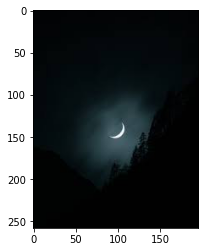

In [ ]:
# lets check out one of our image
# again, please follow along the documentations of all the functions used...
img = Image.open(os.path.join(IMAGE_DIR, "1.jpeg"))
img  = np.asarray(img)
plt.imshow(img)
print(img)
print(type(img))
print(img.shape)


[[[0.00784314 0.01176471 0.01960784]
  [0.00784314 0.01176471 0.01960784]
  [0.00784314 0.01176471 0.01960784]
  ...
  [0.00784314 0.01176471 0.01960784]
  [0.00784314 0.01176471 0.01960784]
  [0.00784314 0.01176471 0.01960784]]

 [[0.00784314 0.01176471 0.01960784]
  [0.00784314 0.01176471 0.01960784]
  [0.00784314 0.01176471 0.01960784]
  ...
  [0.00784314 0.01176471 0.01960784]
  [0.00784314 0.01176471 0.01960784]
  [0.00784314 0.01176471 0.01960784]]

 [[0.00784314 0.01176471 0.01960784]
  [0.00784314 0.01176471 0.01960784]
  [0.00784314 0.01176471 0.01960784]
  ...
  [0.00784314 0.01176471 0.01960784]
  [0.00784314 0.01176471 0.01960784]
  [0.00784314 0.01176471 0.01960784]]

 ...

 [[0.00392157 0.01176471 0.00784314]
  [0.00392157 0.01176471 0.00784314]
  [0.00392157 0.01176471 0.00784314]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]]

 [[0.00784314 0.00784314 0.00784314]
  [0.00784314 0.00784314 0.00784314]


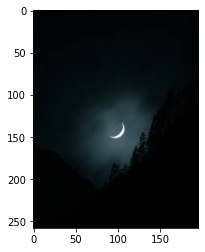

In [ ]:
img_reduced = img/255            # Pixel Value range for each Color channel (0 to 255)
plt.imshow(img_reduced)
print(img_reduced)
print(type(img_reduced))
print(img_reduced.shape)

In [ ]:
img = cv2.resize(img_reduced, (224, 224))

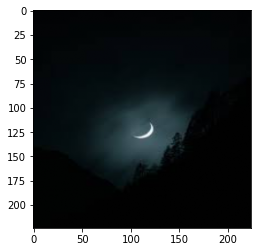

In [ ]:
plt.imshow(img)

### Now, let's prepare our images

In [ ]:
# image size, width = height = 224 pixels

IMAGE_SIZE = 224

# X will our main image array and it will contain all the images array
# first we are defining it as a list

X = []

# using for loop to iterate through all the objects in the images_name_list, objects are file names
for img_name in images_name_list:
    
    # joining path to image dir to image name to get the full path to the image
    img_path = os.path.join(IMAGE_DIR, img_name) 
    
    # imread is used to read an image from file path, it return an array of the image 
    # 1 is used because we want RGB image, if you want to use greyscale image, use 0.
    img = cv2.imread(img_path, 1)
    
    # resize all image to a fix size (224, 224, 3). 3 defines the channels (Red, green blue)
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))    #?????????????????? Let students to decide 
    
    # appending all the images to X, one by one
    X.append(img)
    
# Converting into array
X = np.asarray(X, dtype = np.float32)
print('X_shape before reshaping',X.shape)

X_shape before reshaping (75, 224, 224, 3)


In [ ]:
X

array([[[[ 49.,  16.,   7.],
         [ 49.,  15.,   7.],
         [ 50.,  14.,   6.],
         ...,
         [ 24.,   3.,   2.],
         [ 21.,   2.,   2.],
         [ 33.,  12.,  14.]],

        [[ 49.,  16.,   7.],
         [ 49.,  15.,   6.],
         [ 50.,  14.,   6.],
         ...,
         [ 22.,   2.,   1.],
         [ 20.,   1.,   0.],
         [ 28.,   8.,  10.]],

        [[ 49.,  15.,   6.],
         [ 49.,  14.,   6.],
         [ 50.,  14.,   5.],
         ...,
         [ 22.,   1.,   0.],
         [ 22.,   3.,   3.],
         [ 23.,   3.,   4.]],

        ...,

        [[111.,  50.,  14.],
         [131.,  69.,  33.],
         [158.,  97.,  61.],
         ...,
         [ 34.,   6.,   1.],
         [ 34.,   6.,   1.],
         [ 34.,   6.,   1.]],

        [[113.,  51.,  15.],
         [125.,  63.,  27.],
         [128.,  67.,  31.],
         ...,
         [ 34.,   5.,   1.],
         [ 34.,   5.,   1.],
         [ 34.,   5.,   1.]],

        [[113.,  51.,  15.],
       

In [ ]:
# pixel range is 0-255 currently. 
# we will normalize it between (0-1) for less computation
X = X/255.0

# lets check the final shape of the Final Image Array
print('X_Shape afer reshaping',X.shape)

X_Shape afer reshaping (75, 224, 224, 3)


In [ ]:
X

array([[[[0.19215687, 0.0627451 , 0.02745098],
         [0.19215687, 0.05882353, 0.02745098],
         [0.19607843, 0.05490196, 0.02352941],
         ...,
         [0.09411765, 0.01176471, 0.00784314],
         [0.08235294, 0.00784314, 0.00784314],
         [0.12941177, 0.04705882, 0.05490196]],

        [[0.19215687, 0.0627451 , 0.02745098],
         [0.19215687, 0.05882353, 0.02352941],
         [0.19607843, 0.05490196, 0.02352941],
         ...,
         [0.08627451, 0.00784314, 0.00392157],
         [0.07843138, 0.00392157, 0.        ],
         [0.10980392, 0.03137255, 0.03921569]],

        [[0.19215687, 0.05882353, 0.02352941],
         [0.19215687, 0.05490196, 0.02352941],
         [0.19607843, 0.05490196, 0.01960784],
         ...,
         [0.08627451, 0.00392157, 0.        ],
         [0.08627451, 0.01176471, 0.01176471],
         [0.09019608, 0.01176471, 0.01568628]],

        ...,

        [[0.43529412, 0.19607843, 0.05490196],
         [0.5137255 , 0.27058825, 0.12941177]

#### Preparing our Moon detection boxes in the Image

In [ ]:
annot_path = os.path.join(ANNOT_DIR, annots_name_list[1])

# for our python to understand the xml files, we need an XML parser
# ET from xml module create a tree structure of the whole xml file

import xml.etree.ElementTree as ET

'''
<annotation>
	<folder>Images</folder>
	<filename>1.jpeg</filename>
	<path>/home/yash/Downloads/Moon dataset/Images/1.jpeg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>196</width>
		<height>258</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>moon</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>87</xmin>
			<ymin>129</ymin>
			<xmax>113</xmax>
			<ymax>158</ymax>
		</bndbox>
	</object>
</annotation>

This is what the whole structure of an xml file looks like
'''


# parsing an xml file from the file name
tree = ET.parse(annot_path)

# getting the root element
root = tree.getroot()
# root has a tag ("annotation") and a dictionary of attributes:

# now we need to find the size of our image file
size = root.find("size")

# extracting height and width of image file
h = int(size.find("height").text)
w = int(size.find("width").text)

# extracting coordinates of bounding box of our moon 
bndbox = root.find("object").find("bndbox")

# top left of image is (0,0) and then it increase to rightwards and downwards
# xmin and ymin are the coordinates of upper left corner and
# xmax and ymax are the coordinates of the lower right corner
xmin = int(bndbox.find("xmin").text)/w
xmax = int(bndbox.find("xmax").text)/w

# ------------------------------------------------------------------------

#TASK - 3

# similarly do it for ymin and ymax too

# HINT: key is devide by height instead of width

ymin = int(bndbox.find("ymin").text)/h           #????????????? Let students to decide
ymax = int(bndbox.find("ymax").text)/h           #????????????? Let students to decide

#--------------------------------------------------------------------------

# now here is an important thing to understand
# remember we resized our image to a specific size (224, 224), but our annotations stayed the same. 
# so what we did here above is reduced the value of coordinates with unitery method 
# and now we will multiply them with our required size to fix them exactly as we need
xmin = int(xmin * 224)
xmax = int(xmax * 224)
ymin = int(ymin * 224)
ymax = int(ymax * 224)


### Let's look at one resized final image with resized bounding box on it 

(99, 112)
(129, 137)


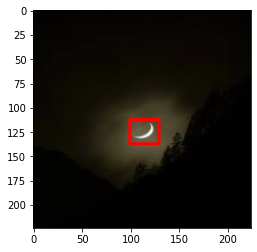

In [ ]:
# defining rectangle function params value
start_point = (xmin, ymin)
end_point = (xmax, ymax)
color = (255, 0, 0)  # Make only one channel alive out of 3 channels
thickness = 2        # Thickness of bounding box   

# to access the example image using openCV
# using rectangle function to make the bounding box on the image
# https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9
example_img = cv2.rectangle(X[1], start_point, end_point, color, thickness)

print(start_point)
print(end_point)

# to plot the image
plt.imshow(example_img) 
plt.show()

So, I think now you got some pretty good idea of what we are doing and how we are doing.

A machine learning model typically requires two things, data that will be fed into the model and what we want as the output.
So, in our case, we want to feed images of moon into the model, and we want it to predict the position as a bounding box in the image. 

Above we prepared images, X, to feed into the model, and we have have understood what we want from our model.

### Now let's prepare y, our expected output from the model.


In [ ]:
y = []

# we will do exactly as we did above
for annot_name in annots_name_list:
    annot_path = os.path.join(ANNOT_DIR, annot_name)
    tree = ET.parse(annot_path)
    root = tree.getroot()
    size = root.find("size")
    h = int(size.find("height").text)
    w = int(size.find("width").text)

    bndbox = root.find("object").find("bndbox")
    xmin = int(bndbox.find("xmin").text)/w
    xmax = int(bndbox.find("xmax").text)/w
    ymin = int(bndbox.find("ymin").text)/h
    ymax = int(bndbox.find("ymax").text)/h
    
    y.append([xmin, ymin, xmax, ymax])
    
y = np.asarray(y, dtype = np.float32)
print(y.shape)
# For every image of size (224,224,3) we want four values defining the coordinates of the box

(75, 4)


In [ ]:
y[1]

array([0.44387755, 0.5       , 0.57653064, 0.6124031 ], dtype=float32)

#### Let's segregate the data into training and test



In [ ]:
# it's a good pratice to divide your data into two sets, training set on which your model will be trained
# and testing set, on which your model will be tested


# ------------------------------------------------------------------------

#TASK - 4
# devide you data into training and test set
# HINT: separate first 60 image and annots for training set and other 15 for test set
# use slicing to separate the array [:]

# training set
x_train = X[:60]      #????????????????? let students decide
# test images form 60 to end
x_test = X[60:]       #???????????????? Let students decide
# this is training set for labels
y_train = y[:60]      #???????????????? Let students decide
# test set for labels
y_test = y[60:]       #???????????????? Let students decide

#--------------------------------------------------------------------------

In [ ]:
print("X_train.shape:",x_train.shape)
print("y_train.shape:",y_train.shape)
print("x_test.shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: (60, 224, 224, 3)
y_train.shape: (60, 4)
x_test.shape: (15, 224, 224, 3)
y_test.shape: (15, 4)



### Understanding Tensorflow, Keras and Building our ML Model

Yesterday, we understood all about importing our dataset, basic data anaylsis and segregation of our data into training and testing set.

Now, we need to do some heavy lifting here. 

Note: The below image is extracted from some other source and it may not exactly represent our model, but it will give you a nice idea of a Convolutional Neural Network, something that we will be using here.  

## Neural Networks

We'll build a neural network (or deep learning network) to learn the associations between moon images and coordinates of bounding boxes.

### Neurons

Neural networks process information similar to how our brains work. Our brains have neurons or nerve cells that transmit and process information from our senses. Many nerve cells are arranged as a network of nerves in the brain. The nerves pass electrical impulses from one neuron to the next in the network.

Neural networks have millions of neurons and nerves. To build a functional neural network, we wire the neurons and nerves together in two steps:

    Step A: Build all the neurons.
    Step B: Wire the neurons in an appropriate way. (There are thousands of ways to wire neurons.)


We tell the computer to combine the sequences of neurons into a matrix. The matrix represents the best pattern we have to describe the features for types of space rock. This matrix is a wired network.

We'll train our model to predict the rock type. We'll compare the rock features in a new image with the matrix pattern. Each time we run the model, the matrix grows and the prediction accuracy improves. Our goal is to test the model and achieve a prediction accuracy close to 100%.

One of the best article about neural networks is here: https://www.3blue1brown.com/lessons/neural-networks

### Let's first more deeply understand what an Image is?

![](http://3b1b-posts.us-east-1.linodeobjects.com//content/lessons/2017/neural-networks/pixel-values.png)

## Dense Layer

# ![](http://3b1b-posts.us-east-1.linodeobjects.com//content/lessons/2017/neural-networks/output-layer.png)

So, as we have seen above, for our (224 X 224 X 3) image, our first layer of neural network will contain 150,528 units in one Dense Layer. And multiplications of all the **Dense layers** with each other is a lot of computation for our lil computers.

#### That's where Convolutional layers comes into picture.

### Convolution

In mathematics, casually speaking, a mixture of two functions. In machine learning, a convolution mixes the convolutional filter and the input matrix in order to train weights.

The term "convolution" in machine learning is often a shorthand way of referring to either convolutional operation or convolutional layer.

Without convolutions, a machine learning algorithm would have to learn a separate weight for every cell in a large tensor. For example, a machine learning algorithm training on 2K x 2K images would be forced to find 4M separate weights. Thanks to convolutions, a machine learning algorithm only has to find weights for every cell in the convolutional filter, dramatically reducing the memory needed to train the model. When the convolutional filter is applied, it is simply replicated across cells such that each is multiplied by the filter.

### Convolution Filter

One of the two actors in a convolutional operation. (The other actor is a slice of an input matrix.) A convolutional filter is a matrix having the same rank as the input matrix, but a smaller shape. For example, given a 28x28 input matrix, the filter could be any 2D matrix smaller than 28x28.

In photographic manipulation, all the cells in a convolutional filter are typically set to a constant pattern of ones and zeroes. In machine learning, convolutional filters are typically seeded with random numbers and then the network trains the ideal values.

### Convolutional Layer

A layer of a deep neural network in which a convolutional filter passes along an input matrix. For example, consider the following 3x3 convolutional filter:

![](http://developers.google.com/machine-learning/glossary/images/ConvolutionalFilter33.svg)

The following animation shows a convolutional layer consisting of 9 convolutional operations involving the 5x5 input matrix. Notice that each convolutional operation works on a different 3x3 slice of the input matrix. The resulting 3x3 matrix (on the right) consists of the results of the 9 convolutional operations:

![](http://developers.google.com/machine-learning/glossary/images/AnimatedConvolution.gif)

## Convolutional Neural Network

A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:

    convolutional layers
    pooling layers
    dense layers

Convolutional neural networks have had great success in certain kinds of problems, such as image recognition.

### Pooling

A pooling operation, just like a convolutional operation, divides that matrix into slices and then slides that convolutional operation by strides. For example, suppose the pooling operation divides the convolutional matrix into 2x2 slices with a 1x1 stride. As the following diagram illustrates, four pooling operations take place. Imagine that each pooling operation picks the maximum value of the four in that slice:

![](http://developers.google.com/machine-learning/glossary/images/PoolingConvolution.svg)



## Building a Convolutional Neural Network 

![](http://www.researchgate.net/profile/Jose-Benitez-Andrades/publication/339447623/figure/fig2/AS:862056077082627@1582541593714/A-vanilla-Convolutional-Neural-Network-CNN-representation.png)

In [ ]:
# Sequential groups a linear stack of layers into a tf.keras.Model.
model = Sequential()

# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# model.add(Input(shape=(224,224,3)))
model.add(Flatten())
# model.add(Dense(1000, activation ='relu'))
model.add(Dense(64, activation ='relu'))
model.add(Dense(4, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [ ]:
model.compile(optimizer='adam',
              loss = "mse",
              metrics=['accuracy'])


# fit method Trains the model for a fixed number of epochs (iterations on a dataset).
# here we fit the model into our own dataset and train it for 30 epochs with batch size of 4

history = model.fit(x_train, y_train, epochs=30, batch_size = 1)


#Transfer Learning

Let's define here VGG model

In here we will directly access the trained VGG model using Keras, in which we access trained 'weights' parameters and with standard input size.

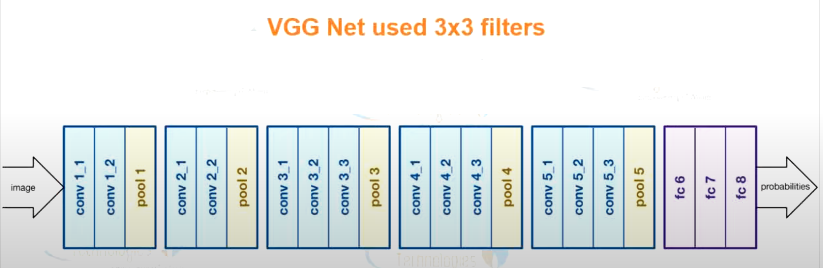

In [ ]:
# defining VGG model
vgg = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

vgg.trainable = False

# Now flateen the VGG tensor
flatten = vgg.output
flatten = Flatten()(flatten)

# adding dense layer of num of units 128 and using activation as Relu
bboxHead = Dense(128, activation="relu")(flatten)

# adding dense layer of num of units 64 and using activation as Relu
bboxHead = Dense(64, activation="relu")(bboxHead)

# adding dense layer of num of units 32 and using activation as Relu
bboxHead = Dense(32, activation="relu")(bboxHead)


# ------------------------------------------------------------------------

#TASK - 5
# create one more dense layer as above 
# HINT: use 4 as number of units and "sigmoid" as activation function 

bboxHead = Dense(4, activation="sigmoid")(bboxHead)       #  ??????????????????? Let students to decide

#--------------------------------------------------------------------------


# Now defining the model, in which input is VGG and output is the 'BBOXHEAD'
model = Model(inputs=vgg.input, outputs=bboxHead)

model.summary() # to print the model summary

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model.compile(optimizer='adam',
              loss = "mse",
              metrics=['accuracy'])


# fit method Trains the model for a fixed number of epochs (iterations on a dataset).
# here we fit the model into our own dataset and train it for 30 epochs with batch size of 4

history = model.fit(x_train, y_train, epochs=10, batch_size = 4)

Epoch 1/10
15/15 [==============================] - 30s 2s/step - loss: 0.0158 - accuracy: 0.6667
Epoch 2/10
15/15 [==============================] - 27s 2s/step - loss: 0.0180 - accuracy: 0.7667
Epoch 3/10
15/15 [==============================] - 29s 2s/step - loss: 0.0173 - accuracy: 0.7667
Epoch 4/10
15/15 [==============================] - 28s 2s/step - loss: 0.0133 - accuracy: 0.7833
Epoch 5/10
15/15 [==============================] - 27s 2s/step - loss: 0.0107 - accuracy: 0.8333
Epoch 6/10
15/15 [==============================] - 29s 2s/step - loss: 0.0115 - accuracy: 0.7333
Epoch 7/10
15/15 [==============================] - 27s 2s/step - loss: 0.0084 - accuracy: 0.8500
Epoch 8/10
15/15 [==============================] - 27s 2s/step - loss: 0.0079 - accuracy: 0.8667
Epoch 9/10
15/15 [==============================] - 27s 2s/step - loss: 0.0095 - accuracy: 0.9000
Epoch 10/10
15/15 [==============================] - 29s 2s/step - loss: 0.0082 - accuracy: 0.8333


## Get predictions from our trained model on the test set

In [ ]:
# prediction for all test set
# using predict function
preds = model.predict(x_test)

In [ ]:
preds

array([[0.3829717 , 0.3581398 , 0.6145441 , 0.5522542 ],
       [0.5004339 , 0.19937697, 0.61403155, 0.36060473],
       [0.5112375 , 0.28468263, 0.5816359 , 0.4407448 ],
       [0.21294615, 0.32306445, 0.77032447, 0.64522177],
       [0.40075177, 0.17287916, 0.49449217, 0.31867057],
       [0.45230037, 0.4027602 , 0.60376656, 0.58430135],
       [0.49549878, 0.28008652, 0.5795912 , 0.40993038],
       [0.43333706, 0.2340158 , 0.6018104 , 0.4570377 ],
       [0.5381186 , 0.21794257, 0.62269336, 0.36220056],
       [0.4655046 , 0.23105845, 0.5589595 , 0.38510227],
       [0.44981492, 0.3688149 , 0.57397556, 0.56219816],
       [0.4552123 , 0.25143927, 0.5824816 , 0.39792803],
       [0.25376606, 0.33537954, 0.75232154, 0.6648074 ],
       [0.49647853, 0.30793917, 0.5479646 , 0.4222207 ],
       [0.5212606 , 0.3128401 , 0.5919543 , 0.49032858]], dtype=float32)

### Generating final results

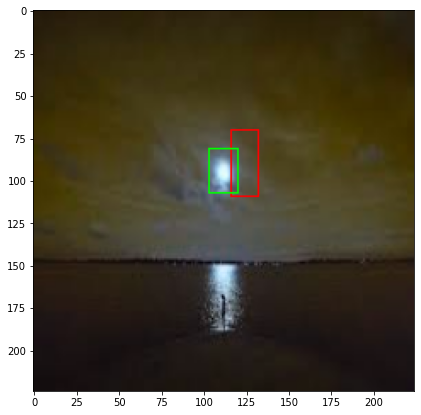

In [ ]:

sample_index = 14

# finding coordinates for our prediction and actual bounding boxes
pred_bb = [int(i*224) for i in preds[sample_index]]
actual_bb = [int(i*224) for i in y_test[sample_index]]

# start point is top left corner and end point is bottom right corner
pred_start_point = (pred_bb[0], pred_bb[1])
pred_end_point = (pred_bb[2], pred_bb[3])

actual_start_point = (actual_bb[0],actual_bb[1])
actual_end_point = (actual_bb[2], actual_bb[3])

# colors for the box
red = (255, 0, 0) # actual
green = (0, 255, 0) # preds
thickness = 1

# ------------------------------------------------------------------------

# TASK - 6

# here is your final task
# use rectange function as used previously to show the actual and predicted bounded boxes on the test image
# use image with index as sample_index from test set and predicted start and end points to draw the red bounding box

img_with_predicted_bb = cv2.rectangle(x_test[sample_index],pred_start_point,pred_end_point,red,thickness)

#--------------------------------------------------------------------------

img_with_pred_and_actual_bb = cv2.rectangle(img_with_predicted_bb, actual_start_point, actual_end_point, green, thickness) #??????????????????????? Let students decide....



# to show final image
plt.figure(figsize= (7,7))
plt.imshow(img_with_pred_and_actual_bb)
plt.show()

You should see an image with two bounding boxes, the green bb is the actual box and red is the predicted box from the model.


Some results can be absured because despite using a very large model, our dataset was very very small campared to the datasets that contains thousands of images. 